In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("happiness_score_dataset.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.shape

(158, 12)

In [28]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [5]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
data['Country'].value_counts()

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64

In [8]:
data['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [9]:
data['Country'].nunique()

158

In [10]:
data['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [17]:
data['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [18]:
data['Region'].nunique()

10

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

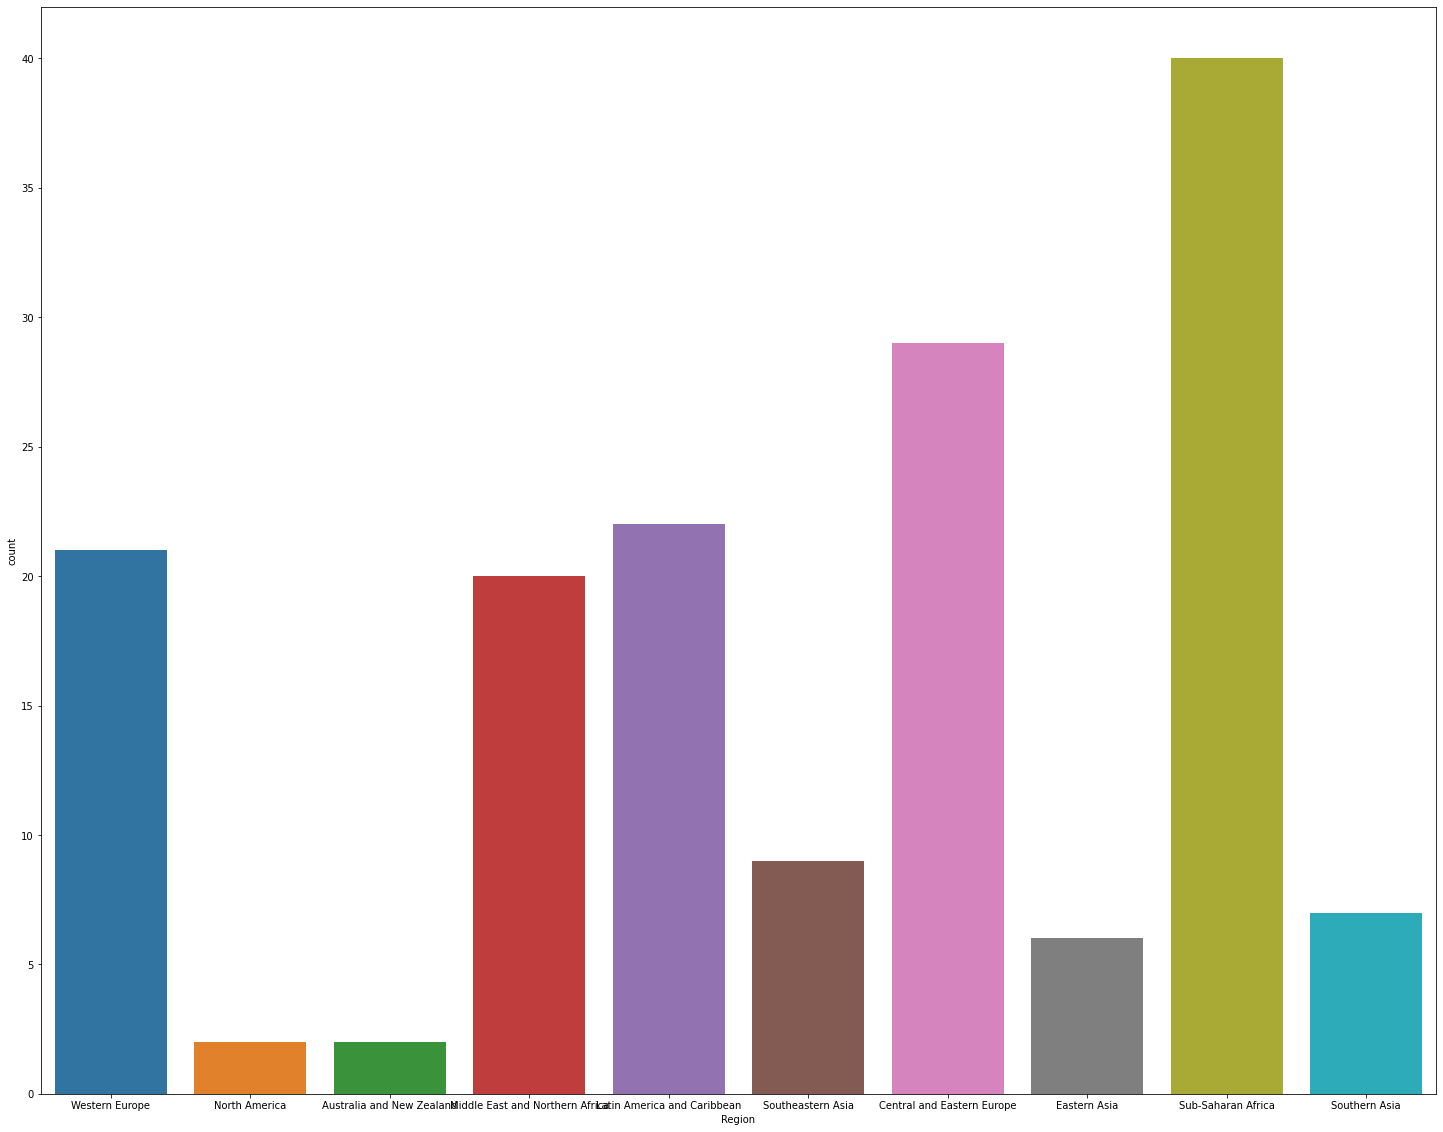

In [23]:
plt.figure(figsize=(25,20))
sns.countplot(x='Region',data=data)
print(data['Region'].value_counts())
plt.show

In [24]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# Distribution of the continuous columns:

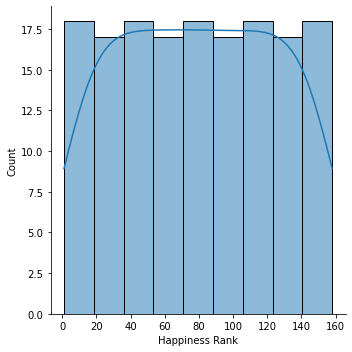

In [29]:
sns.displot(data['Happiness Rank'],kde=True)

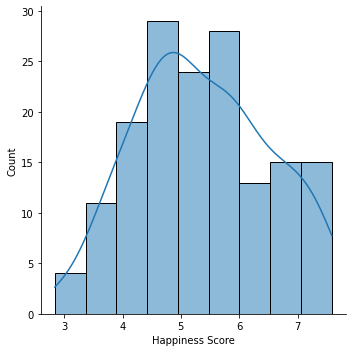

In [30]:
sns.displot(data['Happiness Score'],kde=True)

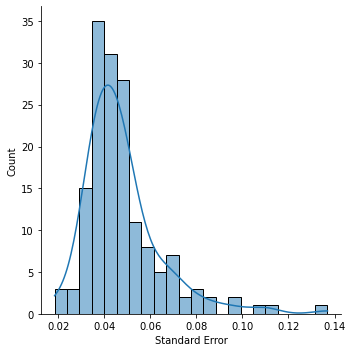

In [31]:
sns.displot(data['Standard Error'],kde=True)

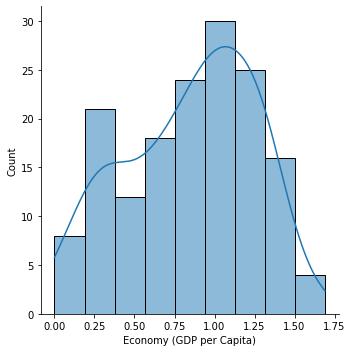

In [33]:
sns.displot(data['Economy (GDP per Capita)'],kde=True)

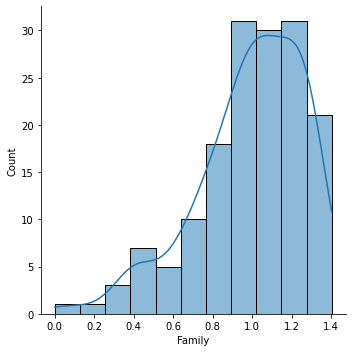

In [34]:
sns.displot(data['Family'],kde=True)

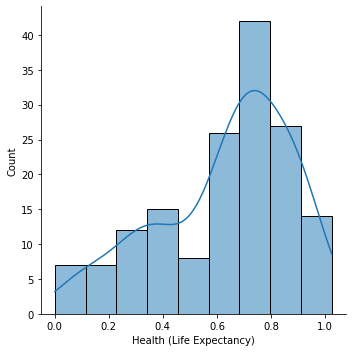

In [35]:
sns.displot(data['Health (Life Expectancy)'],kde=True)

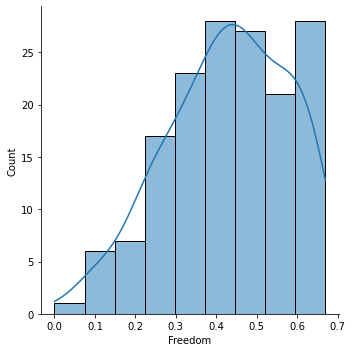

In [36]:
sns.displot(data['Freedom'],kde=True)

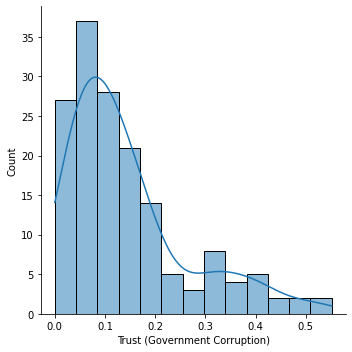

In [37]:
sns.displot(data['Trust (Government Corruption)'],kde=True)

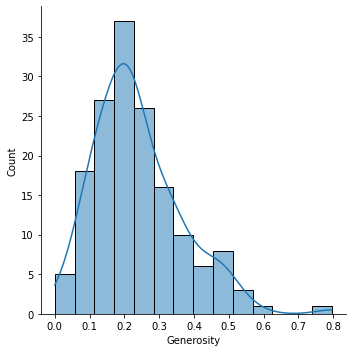

In [38]:
sns.displot(data['Generosity'],kde=True)

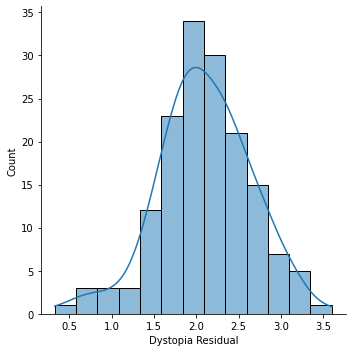

In [40]:
sns.displot(data['Dystopia Residual'],kde=True)

# Encoding of dataframe

In [44]:
pip install category_encoders

In [45]:
from category_encoders import BinaryEncoder

In [47]:
bi=BinaryEncoder()

In [60]:
df_bi=bi.fit_transform(data[['Country','Region']])
df_bi

,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Region_0,Region_1,Region_2,Region_3
0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,1,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,0,0,1,1,0,1,0,1,0,0,1
154,1,0,0,1,1,0,1,1,1,0,0,1
155,1,0,0,1,1,1,0,0,0,1,0,0
156,1,0,0,1,1,1,0,1,1,0,0,1


In [61]:
from sklearn.compose import make_column_transformer

In [62]:
ct=make_column_transformer((bi,['Country','Region']),remainder='passthrough')

In [64]:
encoded=pd.DataFrame(ct.fit_transform(data))
encoded

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,154.0,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,155.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,156.0,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,157.0,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [66]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [67]:
encoded=pd.DataFrame(ct.fit_transform(data),
                    columns=['Country_0','Country_1','Country_2','Country_3','Country_4','Country_5','Country_6','Country_7','Region_0','Reigion_1','Reigion_2','Region_3','Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'])

In [68]:
encoded

,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Region_0,Reigion_1,...,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,154.0,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,155.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,156.0,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,157.0,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [71]:
encoded.describe()

,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Region_0,Reigion_1,...,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.00000,158.00000,158.00000,158.00000,158.00000,158.000000,158.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.196203,0.405063,0.405063,0.50000,0.50000,0.50000,0.50000,0.50000,0.335443,0.506329,...,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,0.398386,0.492465,0.492465,0.50159,0.50159,0.50159,0.50159,0.50159,0.473646,0.501550,...,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,...,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,...,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,0.000000,0.000000,0.000000,0.50000,0.50000,0.50000,0.50000,0.50000,0.000000,1.000000,...,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,0.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.00000,1.00000,1.000000,1.000000,...,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.00000,1.00000,1.000000,1.000000,...,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [72]:
encoded.dtypes

Country_0                        float64
Country_1                        float64
Country_2                        float64
Country_3                        float64
Country_4                        float64
Country_5                        float64
Country_6                        float64
Country_7                        float64
Region_0                         float64
Reigion_1                        float64
Reigion_2                        float64
Region_3                         float64
Happiness Rank                   float64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

# plotting the heatmap :

In [76]:
df_corr=encoded.corr()

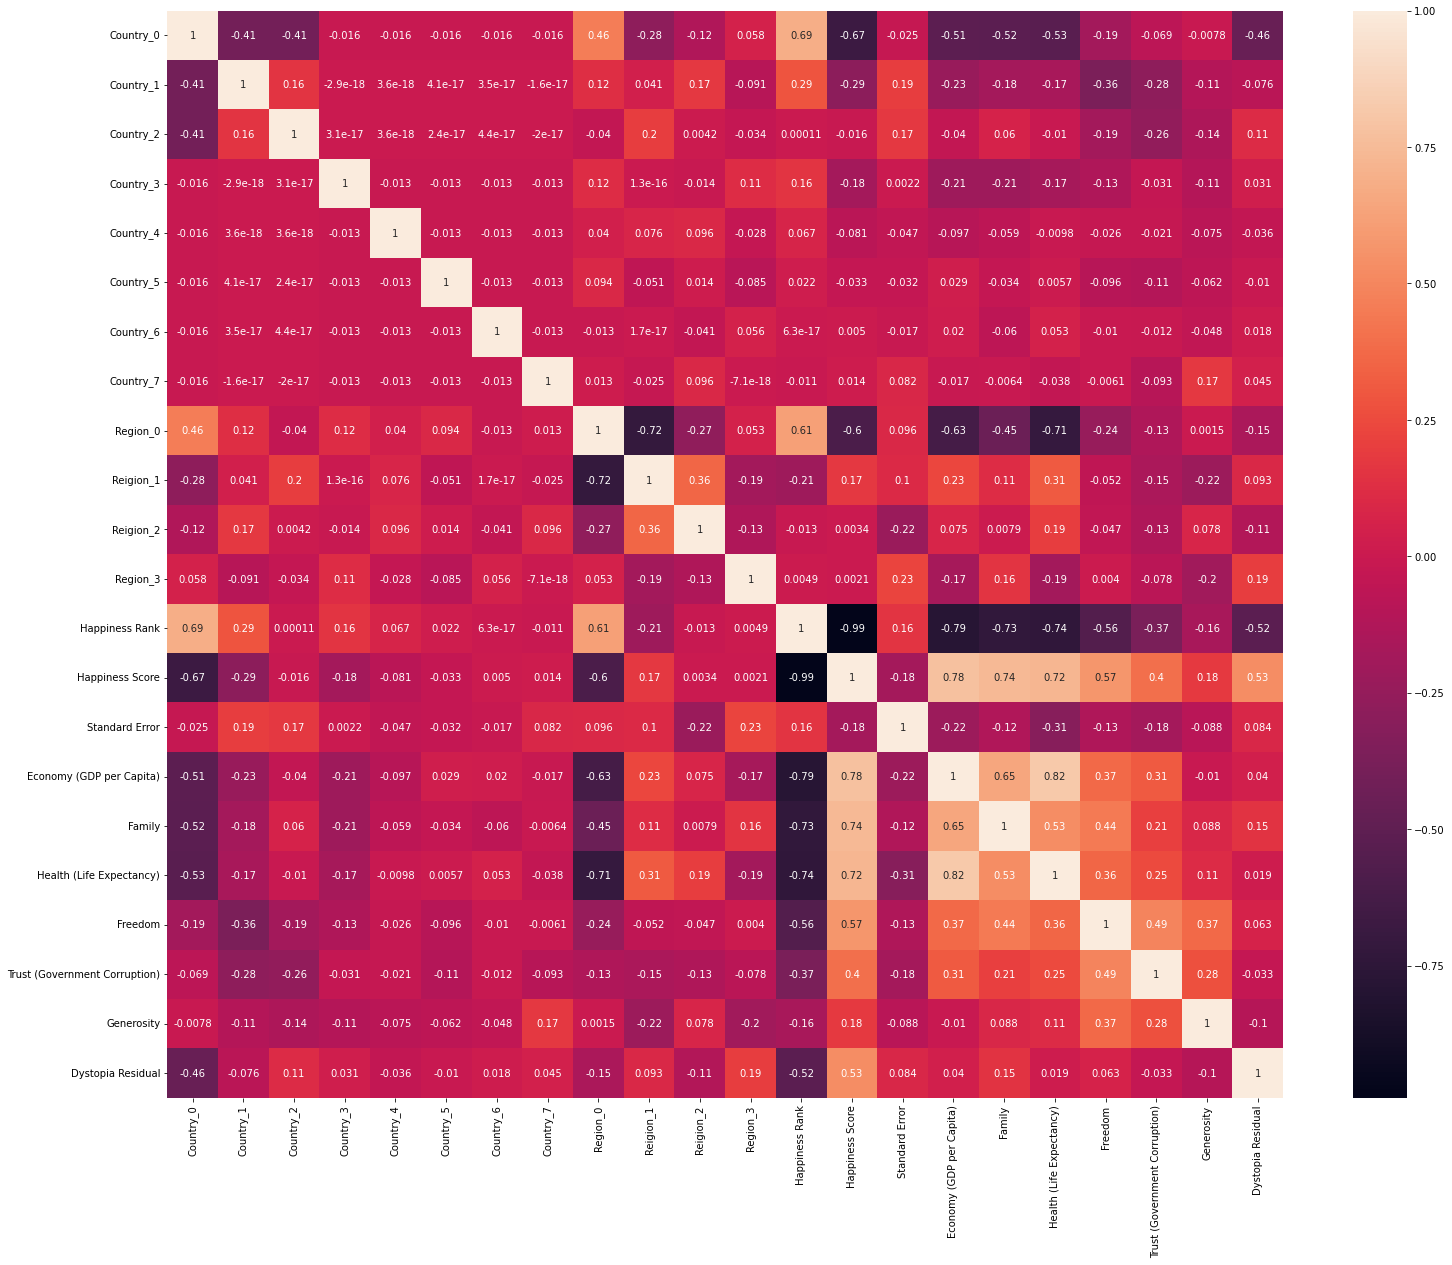

In [77]:
plt.figure(figsize=(25,20))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

# Correlation of the feature columns with the target columns:

In [79]:
encoded.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Country_0                       -0.673095
Region_0                        -0.598725
Country_1                       -0.285873
Country_3                       -0.178409
Standard Error                  -0.177254
Country_4                       -0.081480
Country_5                       -0.032628
Country_2                       -0.015780
Region_3                         0.002082
Reigion_2                        0.003393
Country_6                        0.004991
Country_7                        0.014473
Reigion_1                        0.174955
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

# checking the columns which are positively and negatively correlated with the target columns:

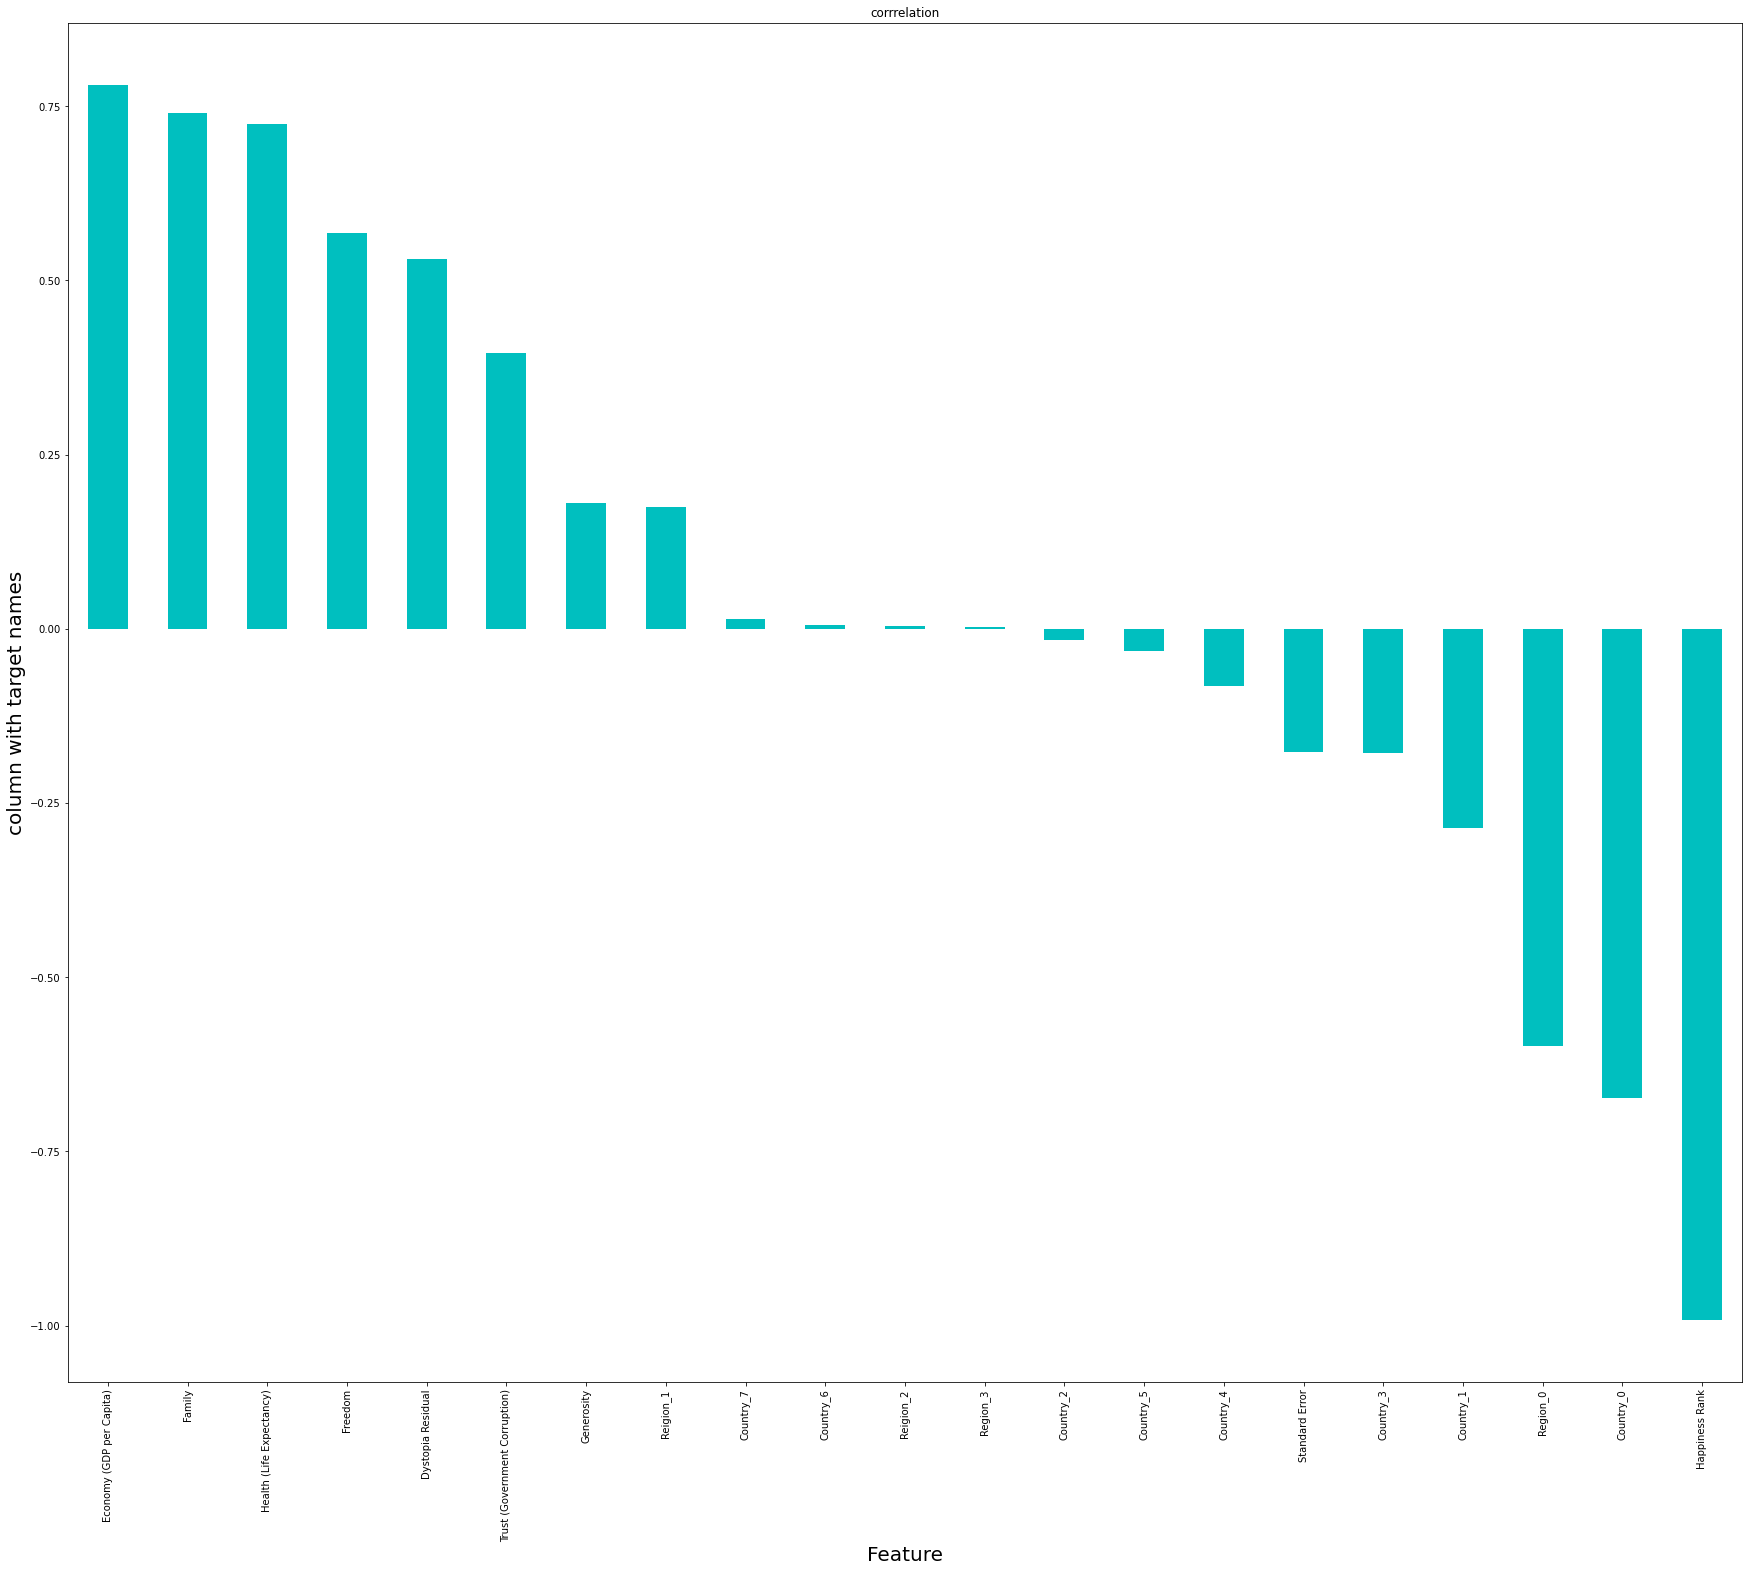

In [80]:
plt.figure(figsize=(30,25))
encoded.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('column with target names',fontsize=20)
plt.title('corrrelation',fontsize=12)
plt.show()

In [81]:
encoded.skew()

Country_0                        1.544693
Country_1                        0.390500
Country_2                        0.390500
Country_3                        0.000000
Country_4                        0.000000
Country_5                        0.000000
Country_6                        0.000000
Country_7                        0.000000
Region_0                         0.703760
Reigion_1                       -0.025562
Reigion_2                        0.828884
Region_3                        -0.997868
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

checking the outliers:

In [83]:
encoded_feature=encoded.drop('Happiness Score',axis=1)

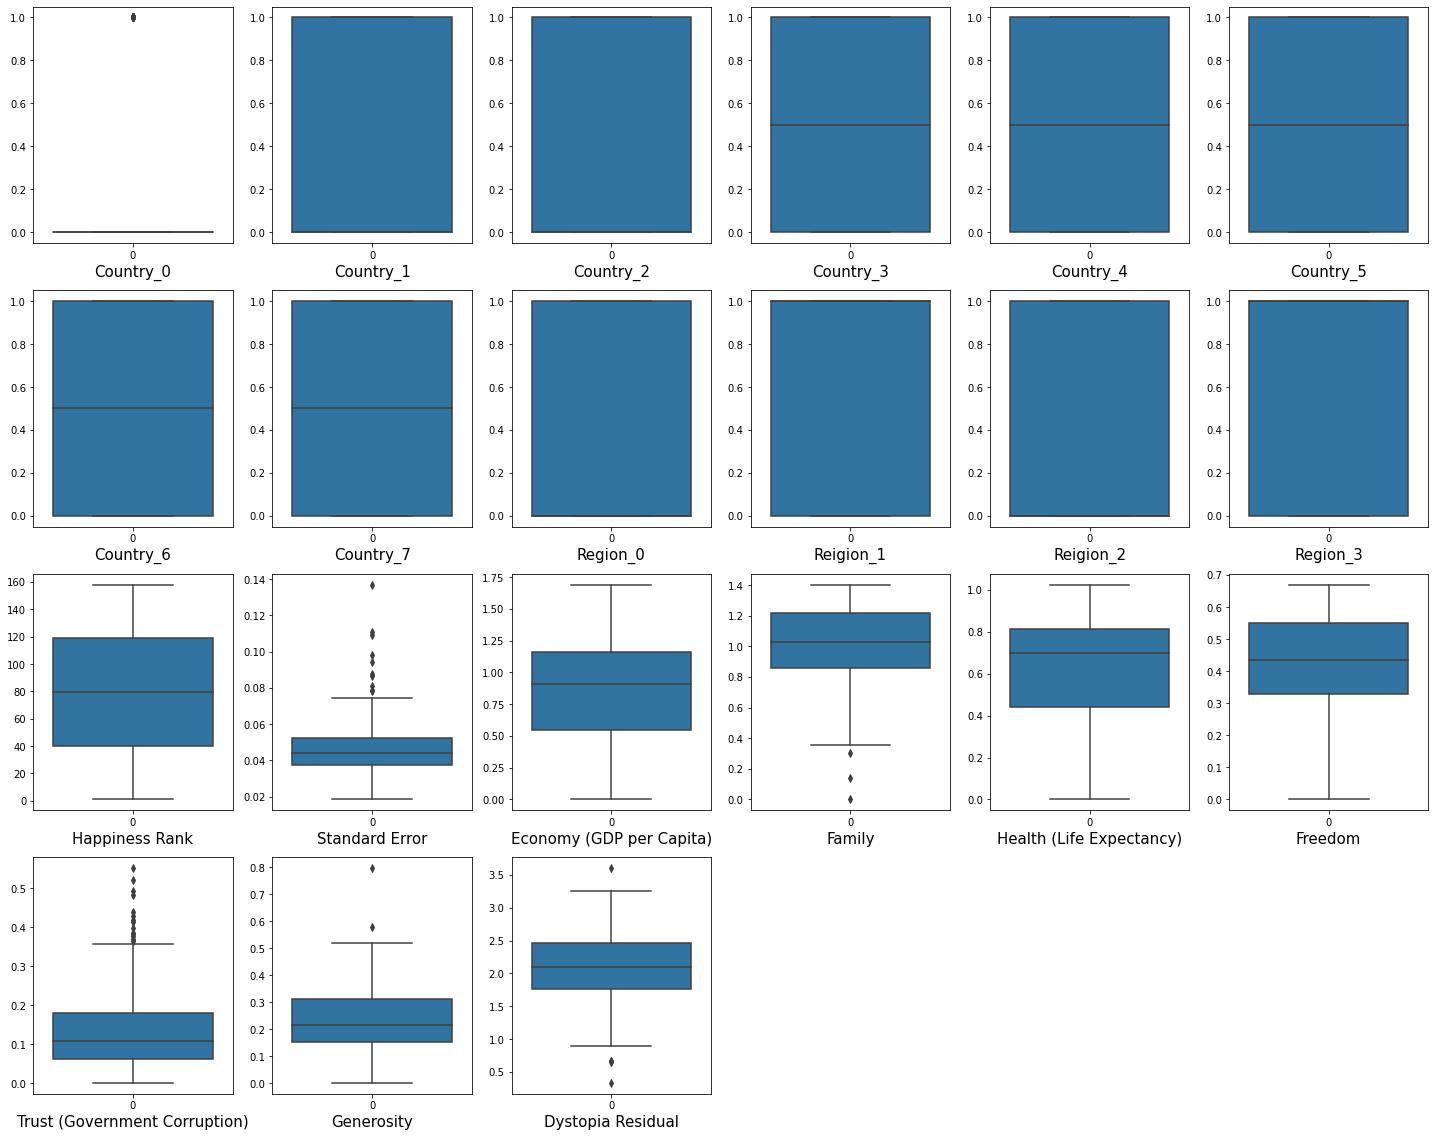

In [86]:
plt.figure(figsize=(25,20))
plotnumber=1

for column in encoded_feature:
    if plotnumber<=22:
        plt.subplot(4,6,plotnumber)
        ax=sns.boxplot(data=encoded_feature[column])
        plt.xlabel(column,fontsize=15)
        
        plotnumber+=1
plt.show()

handling the outliers:

In [88]:
from scipy.stats import zscore

In [89]:
z_score=zscore(encoded[['Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']])

abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

encoded=encoded[filtering_entry]

encoded

,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Region_0,Reigion_1,...,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,151.0,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,152.0,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,153.0,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,155.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [92]:
from sklearn.metrics import r2_score

In [93]:
x=encoded.drop(columns=['Happiness Score'])
y=encoded['Happiness Score']

In [95]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [96]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"at random state{i} , the training accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"at random state{i} , the testing accuracy is:-{r2_score(y_test,pred_test)}")

at random state0 , the training accuracy is:-0.9999999531704626
at random state0 , the testing accuracy is:-0.9999999096936566
at random state1 , the training accuracy is:-0.9999999584509506
at random state1 , the testing accuracy is:-0.9999998619833314
at random state2 , the training accuracy is:-0.9999999503071791
at random state2 , the testing accuracy is:-0.9999999314428674
at random state3 , the training accuracy is:-0.9999999554134891
at random state3 , the testing accuracy is:-0.9999998891736012
at random state4 , the training accuracy is:-0.999999940660789
at random state4 , the testing accuracy is:-0.9999999429506506
at random state5 , the training accuracy is:-0.9999999496110538
at random state5 , the testing accuracy is:-0.9999999299644281
at random state6 , the training accuracy is:-0.9999999524674745
at random state6 , the testing accuracy is:-0.9999999089519891
at random state7 , the training accuracy is:-0.9999999587897337
at random state7 , the testing accuracy is:-0.99

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=61)

In [99]:
lr.fit(x_train,y_train)

LinearRegression()

In [100]:
pred_test=lr.predict(x_test)

In [101]:
print(r2_score(y_test,pred_test))

0.9999999420117519


In [103]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold {j} the cv score is{cv_mean} and accuracy score of traing is {train_accuracy} and accuracy score of testing is {test_accuracy}")

at cross fold 2 the cv score is0.9991877414572087 and accuracy score of traing is -0.9821928818614487 and accuracy score of testing is 0.9999999420117519
at cross fold 3 the cv score is0.9969950782821014 and accuracy score of traing is -0.9821928818614487 and accuracy score of testing is 0.9999999420117519
at cross fold 4 the cv score is0.9965722328824305 and accuracy score of traing is -0.9821928818614487 and accuracy score of testing is 0.9999999420117519
at cross fold 5 the cv score is0.9955706009426033 and accuracy score of traing is -0.9821928818614487 and accuracy score of testing is 0.9999999420117519
at cross fold 6 the cv score is0.9999971196970932 and accuracy score of traing is -0.9821928818614487 and accuracy score of testing is 0.9999999420117519
at cross fold 7 the cv score is0.9999952640784846 and accuracy score of traing is -0.9821928818614487 and accuracy score of testing is 0.9999999420117519
at cross fold 8 the cv score is0.9999947444788756 and accuracy score of trai

In [106]:
cv_score=cross_val_score(lr,x,y,cv=5)
cv_mean=cv_score.mean()

In [107]:
cv_mean

0.9955706009426033

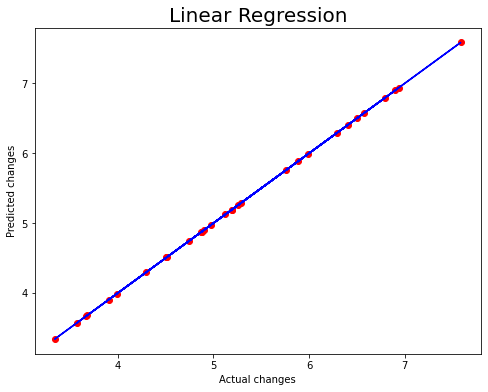

In [108]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual changes",fontsize=10)
plt.ylabel("Predicted changes",fontsize=10)
plt.title("Linear Regression",fontsize=20)
plt.savefig("lr.png")
plt.show()

best fit line is covering most of the data points which shows good fit of our model

# Ensemble technique:

In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [120]:
parameters={'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2']}

In [121]:
rf=RandomForestRegressor()

clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [122]:
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [123]:
rf=RandomForestRegressor(criterion="mae",max_features="log2")
rf.fit(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print("r2 score:",rfs*100)


r2 score: 98.1649731255059


In [126]:
import pickle
filename='Happiness Score.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [127]:
loaded_model=pickle.load(open('Happiness Score.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

98.1649731255059


In [128]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])

In [129]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Predicted,5.21247,4.66093,4.59353,5.33949,6.81623,5.14009,5.12094,5.82898,4.82221,6.39241,...,4.87179,6.21929,6.32217,3.74207,4.90613,3.95268,4.18236,5.66718,3.84572,3.79234
Original,5.21247,4.66093,4.59353,5.33949,6.81623,5.14009,5.12094,5.82898,4.82221,6.39241,...,4.87179,6.21929,6.32217,3.74207,4.90613,3.95268,4.18236,5.66718,3.84572,3.79234
